In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 

In [94]:
dataset = pd.read_csv('data.csv')
for i in dataset.keys():
    print(i)

id
in_reply_to_user_id
is_quote
is_retweet
like_count
quote_count
quoted_text
reply_count
retweet_count
retweet_text
text
urls_expanded_url
urls_url
relevant


In [95]:
dataset

,id,in_reply_to_user_id,is_quote,is_retweet,like_count,quote_count,quoted_text,reply_count,retweet_count,retweet_text,text,urls_expanded_url,urls_url,relevant
0,0,9.140000e+17,False,False,0,0,NaN,1,0,NaN,@OzraeliAvi @SydneyLWatson @RitaPanahi @thejui...,https://www.theguardian.com/australia-news/201...,https://t.co/5AGrpxapqB,Relevant
1,1,2.574775e+08,False,False,2,0,NaN,1,0,NaN,@Red_dragon_fly @warr_cameron @NSWRFS Tell me ...,NaN,NaN,Relevant
2,2,NaN,False,False,0,0,NaN,0,0,NaN,Can we just have a fucking blanket ban on cele...,NaN,NaN,Relevant
3,3,1.429786e+07,False,False,0,0,NaN,0,0,NaN,"@scottsantens Scott, 🙏 for the tweets re: And...",NaN,NaN,Relevant
4,4,1.229958e+08,False,False,0,0,NaN,0,0,NaN,@Javedakhtarjadu Misleading information someti...,NaN,NaN,Irrelevant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,7594,1.816678e+07,False,False,0,0,NaN,0,0,NaN,"@Jim_Jordan Learn about Viruses, Vaccines, Soc...",http://TheBigVirusHoax.com,https://t.co/dujlhndLDR,Relevant
7595,7595,NaN,False,False,0,0,NaN,0,0,NaN,EDITORIAL: Say no to Trudeau's online censorsh...,https://torontosun.com/opinion/editorials/edit...,https://t.co/XHIRTa33yL,Relevant
7596,7596,NaN,False,False,0,0,NaN,0,0,NaN,I hate trump too but at least he ain’t try to ...,NaN,NaN,Irrelevant
7597,7597,NaN,True,False,0,0,@DV_Reporter @immcouncil @POTUS @HouseDemocrat...,0,0,NaN,please HELP and SUPPORT us\nWe are the biggest...,https://twitter.com/Elham40686511/status/13879...,https://t.co/GKSe2f6SiC,Irrelevant


# data Preprocessing

In [63]:
# #taking care of NaN datas
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
# imputer.fit(X)
# X = imputer.transform(X)

In [5]:
def cleanup(text):
    
    #import string
    punctuation = '[!-.:?;"\n"()''"",_%$\|/,<>’‘]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    
    #remove username with a @ and remove the link which start with http
    juntext = " ".join(filter(lambda x:x[0]!='@', text_subbed.split()))
    juntext = " ".join(filter(lambda x:not 'http' in x, juntext.split()))
    
    return juntext.lower()
    

In [6]:
id_text = dataset[['id','text']].copy()

In [7]:
# cleans up text
id_text['text'] = id_text['text'].apply(cleanup)

In [8]:
id_text

,id,text
0,0,the guardian had the balls to ignore the media...
1,1,tell me how a permanent fire ban helps anyone ...
2,2,can we just have a fucking blanket ban on cele...
3,3,scott 🙏 for the tweets re andrew yang im not f...
4,4,misleading information sometimes close the fre...
...,...,...
7594,7594,learn about viruses vaccines social media cens...
7595,7595,editorial say no to trudeaus online censorship...
7596,7596,i hate trump too but at least he aint try to b...
7597,7597,please help and support uswe are the biggest v...


In [9]:
def tokenization(text):
    tokens = text.split()
    return tokens
#applying function to the column
id_text['msg_tokenied']= id_text['text'].apply(lambda x: tokenization(x))

In [10]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
id_text['msg_tokenied']= id_text['msg_tokenied'].apply(lambda x:remove_stopwords(x))

In [11]:
id_text

,id,text,msg_tokenied
0,0,the guardian had the balls to ignore the media...,"[guardian, balls, ignore, media, ban, stopped,..."
1,1,tell me how a permanent fire ban helps anyone ...,"[tell, permanent, fire, ban, helps, anyone, wo..."
2,2,can we just have a fucking blanket ban on cele...,"[fucking, blanket, ban, celebs, tv]"
3,3,scott 🙏 for the tweets re andrew yang im not f...,"[scott, 🙏, tweets, andrew, yang, im, formal, s..."
4,4,misleading information sometimes close the fre...,"[misleading, information, sometimes, close, fr..."
...,...,...,...
7594,7594,learn about viruses vaccines social media cens...,"[learn, viruses, vaccines, social, media, cens..."
7595,7595,editorial say no to trudeaus online censorship...,"[editorial, say, trudeaus, online, censorship,..."
7596,7596,i hate trump too but at least he aint try to b...,"[hate, trump, least, aint, try, ban, backwoods..."
7597,7597,please help and support uswe are the biggest v...,"[please, help, support, uswe, biggest, victims..."


In [12]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [13]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
id_text['msg_stemmed']=id_text['msg_tokenied'].apply(lambda x: stemming(x))

In [17]:
id_text

,id,text,msg_tokenied,msg_stemmed,msg_lemmatized,msg_sent
0,0,the guardian had the balls to ignore the media...,"[guardian, balls, ignore, media, ban, stopped,...","[guardian, ball, ignor, media, ban, stop, shor...","[guardian, ball, ignore, medium, ban, stopped,...",guardian ball ignore medium ban stopped short ...
1,1,tell me how a permanent fire ban helps anyone ...,"[tell, permanent, fire, ban, helps, anyone, wo...","[tell, perman, fire, ban, help, anyon, would, ...","[tell, permanent, fire, ban, help, anyone, wou...",tell permanent fire ban help anyone would camp...
2,2,can we just have a fucking blanket ban on cele...,"[fucking, blanket, ban, celebs, tv]","[fuck, blanket, ban, celeb, tv]","[fucking, blanket, ban, celebs, tv]",fucking blanket ban celebs tv
3,3,scott 🙏 for the tweets re andrew yang im not f...,"[scott, 🙏, tweets, andrew, yang, im, formal, s...","[scott, 🙏, tweet, andrew, yang, im, formal, su...","[scott, 🙏, tweet, andrew, yang, im, formal, su...",scott 🙏 tweet andrew yang im formal supporter ...
4,4,misleading information sometimes close the fre...,"[misleading, information, sometimes, close, fr...","[mislead, inform, sometim, close, free, though...","[misleading, information, sometimes, close, fr...",misleading information sometimes close free th...
...,...,...,...,...,...,...
7594,7594,learn about viruses vaccines social media cens...,"[learn, viruses, vaccines, social, media, cens...","[learn, virus, vaccin, social, media, censorsh...","[learn, virus, vaccine, social, medium, censor...",learn virus vaccine social medium censorship h...
7595,7595,editorial say no to trudeaus online censorship...,"[editorial, say, trudeaus, online, censorship,...","[editori, say, trudeau, onlin, censorship, plan]","[editorial, say, trudeaus, online, censorship,...",editorial say trudeaus online censorship plan
7596,7596,i hate trump too but at least he aint try to b...,"[hate, trump, least, aint, try, ban, backwoods...","[hate, trump, least, aint, tri, ban, backwood,...","[hate, trump, least, aint, try, ban, backwoods...",hate trump least aint try ban backwoods lol
7597,7597,please help and support uswe are the biggest v...,"[please, help, support, uswe, biggest, victims...","[pleas, help, support, usw, biggest, victim, m...","[please, help, support, uswe, biggest, victim,...",please help support uswe biggest victim muslim...


In [15]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
id_text['msg_lemmatized']=id_text['msg_tokenied'].apply(lambda x:lemmatizer(x))

In [16]:
id_text['msg_sent']=id_text['msg_lemmatized'].apply(lambda x:" ".join(x)) 

# classification

In [127]:
# split data to test and train set
X = id_text.iloc[:, -1].values
X.shape

(7599,)

In [97]:
y = dataset.iloc[:, -1].values

In [99]:
for i in range(len(y)):
    if y[i]=='Relevant':
        y[i]=1
    else:
        y[i]=0

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(X).toarray()
labels = y
features.shape

(7599, 4283)

In [122]:
y=y.reshape(7599,)
y=y.astype('int')
labels=labels.astype('int')

In [114]:
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 1)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

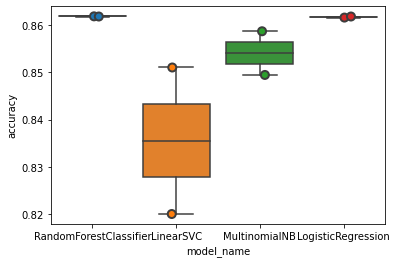

In [124]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [125]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.835507
LogisticRegression        0.861692
MultinomialNB             0.854059
RandomForestClassifier    0.861824
Name: accuracy, dtype: float64

In [115]:
model=RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
model.fit(X_train,y_train)



RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [116]:
y_pred=model.predict(X_test)

In [117]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8730263157894737


In [118]:
for i in range(len(y_pred)):
    print(y_pred[i],'\t',y_test[i])

1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 0
1 	 1
1 	 0
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 0
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 0
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 

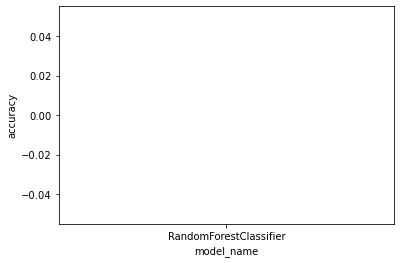

In [57]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [44]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                NaN
LogisticRegression       NaN
RandomForestClassifier   NaN
Name: accuracy, dtype: float64

from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [246]:
X_train[0]

['correlation',
 'leftist',
 'big',
 'tech',
 'shadow',
 'banning',
 'throttling',
 'labeling',
 'throwing',
 'conservative',
 'voice',
 'social',
 'medium',
 'election',
 'capitol',
 'protest',
 '500',
 'trump',
 'supporter',
 'crashed',
 'way',
 'capitol']

In [247]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: setting an array element with a sequence.